# Домашнє завдання: Прогнозування орендної плати за житло

## Мета завдання
Застосувати знання з лекції для побудови моделі лінійної регресії, що прогнозує орендну плату за житло в Індії. Ви пройдете весь цикл вирішення задачі машинного навчання: від дослідницького аналізу до оцінки якості моделі.

## Опис датасету
**House Rent Prediction Dataset** містить інформацію про 4700+ оголошень про оренду житла в Індії з такими параметрами:
- **BHK**: Кількість спалень, залів, кухонь
- **Rent**: Орендна плата (цільова змінна)
- **Size**: Площа в квадратних футах
- **Floor**: Поверх та загальна кількість поверхів
- **Area Type**: Тип розрахунку площі
- **Area Locality**: Район
- **City**: Місто
- **Furnishing Status**: Стан меблювання
- **Tenant Preferred**: Тип орендаря
- **Bathroom**: Кількість ванних кімнат
- **Point of Contact**: Контактна особа

---

## Завдання 1: Завантаження та перший огляд даних (1 бал)

**Що потрібно зробити:**
1. Завантажте дані з файлу `House_Rent_Dataset.csv`
2. Виведіть розмір датасету
3. Покажіть перші 5 рядків
4. Виведіть загальну інформацію про дані (включно з типами даних та кількістю значень)


In [1]:
import pandas as pd
import numpy as np
import plotly.express as px
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objects as go

pd.set_option('display.max_columns', None)

In [2]:
# 1.1 Завантажуємо дані
df = pd.read_csv('../data/House_Rent_Dataset.csv')

In [3]:
# 1.2 Розмір датасету
df.shape

(4746, 12)

In [4]:
# 1.3 Перегляд даних
df.head()

,Posted On,BHK,Rent,Size,Floor,Area Type,Area Locality,City,Furnishing Status,Tenant Preferred,Bathroom,Point of Contact
0,2022-05-18,2,10000,1100,Ground out of 2,Super Area,Bandel,Kolkata,Unfurnished,Bachelors/Family,2,Contact Owner
1,2022-05-13,2,20000,800,1 out of 3,Super Area,"Phool Bagan, Kankurgachi",Kolkata,Semi-Furnished,Bachelors/Family,1,Contact Owner
2,2022-05-16,2,17000,1000,1 out of 3,Super Area,Salt Lake City Sector 2,Kolkata,Semi-Furnished,Bachelors/Family,1,Contact Owner
3,2022-07-04,2,10000,800,1 out of 2,Super Area,Dumdum Park,Kolkata,Unfurnished,Bachelors/Family,1,Contact Owner
4,2022-05-09,2,7500,850,1 out of 2,Carpet Area,South Dum Dum,Kolkata,Unfurnished,Bachelors,1,Contact Owner


In [5]:
# 1.4 Загальна інформація про дані
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4746 entries, 0 to 4745
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Posted On          4746 non-null   object
 1   BHK                4746 non-null   int64 
 2   Rent               4746 non-null   int64 
 3   Size               4746 non-null   int64 
 4   Floor              4746 non-null   object
 5   Area Type          4746 non-null   object
 6   Area Locality      4746 non-null   object
 7   City               4746 non-null   object
 8   Furnishing Status  4746 non-null   object
 9   Tenant Preferred   4746 non-null   object
 10  Bathroom           4746 non-null   int64 
 11  Point of Contact   4746 non-null   object
dtypes: int64(4), object(8)
memory usage: 445.1+ KB


## Завдання 2: Дослідницький аналіз даних (EDA) (4 бали)

**Що потрібно зробити:**
1. **Аналіз пропущених значень.** Перевірте наявність і відсоток пропущених значень у кожній колонці
2. **Базова статистика.** Обчисліть базову статистику (середнє, квартилі, стандартне відхилення) для числових змінних.
3. **Аналіз цільової змінної.** Побудуйте гістограму розподілу цільової змінної (Rent)
4. **Робота з викидами.** Знайдіть та видаліть викиди в цільовій змінній (якщо є). Визначити викиди можна будь-яким зрозумілим для вас способом, як варіант - таким, що використовується в побудові box-plot (https://en.wikipedia.org/wiki/Box_plot#Example_with_outliers).
5. **Аналіз категоріальних змінних.** Виведіть кількість унікальних значень для кожної з категоріальних колонок.


In [6]:
# 2.1 Аналіз пропущених значень
missing = df.isnull().sum()
missing_values = missing[missing > 0]

if missing_values.empty:
    print("Пропущені дані відсутні.")
else:
    print("Пропущені значення знайдено:")
    print(missing_values)

Пропущені дані відсутні.


In [7]:
# 2.2 Базова статистика для числових змінних
stats = df[['BHK', 'Rent', 'Size', 'Bathroom']].describe()
stats.round(2)

,BHK,Rent,Size,Bathroom
count,4746.00,4746.00,4746.00,4746.00
mean,2.08,34993.45,967.49,1.97
std,0.83,78106.41,634.20,0.88
min,1.00,1200.00,10.00,1.00
25%,2.00,10000.00,550.00,1.00
50%,2.00,16000.00,850.00,2.00
75%,3.00,33000.00,1200.00,2.00
max,6.00,3500000.00,8000.00,10.00


**Висновки:**  
- середнє значення 2.08 та медіана 2.00 вказують, що більшість ВНК мають значення 2.
- середнє значення 34993.45 Rent сильно зміщено відносно медіани 16000, це свідчить про наявність високих цін на оренду.
- максимальне значення оренди 3500000 вказує на наявність елітної нерухомості.
- стандартне відхилення 78106.41 вказує на високу варіативність.
- найменший розмір житла 10 квадратних футів (це менше 1 квадратного метру). Скоріш за все - це помилка в даних (бо там ВНК=3).
- найбільшицй розмір житла 8000, скоріш за все це вілли або апартаменти.
- середній розмір житла 967.49 квадратних футів.
- кількість ванних в середньому складає близько 2.
- також є найбільша кількість ванних 10, ймовірно в елітній нерухомості.

In [8]:
# 2.3 Аналіз цільової змінної. Гістограма
fig = px.histogram(
    df,
    x='Rent',
    nbins=100,
    title='Розподіл цільової змінної (орендна плата)',
    labels={'Rent': 'Орендна плата', 'count': 'Кількість житла'}
)
fig.update_layout(
    yaxis_title='Кількість житла',
    showlegend=False,
    height=400
)
fig.show()

In [9]:
# 2.4 Робота з викидами
# 2.4.1 Побудова Box Plot
fig = px.box(
    df,
    x='Rent',
    orientation='h',   # горизонтальна орієнтація
    title='Box Plot орендної плати',
    labels={'Rent': 'Орендна плата'}
)
fig.update_layout(
    height=400,
    title_x=0.5  # центрування заголовка
)

fig.show()

In [10]:
# 2.4.2 Метод міжквартильного розмаху (IQR), видалення викидів

# Крок 1: Розрахунок квартилів
Q1 = df['Rent'].quantile(0.25)
Q3 = df['Rent'].quantile(0.75)
IQR = Q3 - Q1

# Крок 2: Межі для викидів
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Крок 3: Фільтрація даних
df_clean = df[(df['Rent'] >= lower_bound) & (df['Rent'] <= upper_bound)]

# Крок 4: Перевірка результату
print(f"Кількість записів до очищення: {len(df)}")
print(f"Кількість записів після очищення: {len(df_clean)}")
print(f"Видалено викидів: {len(df) - len(df_clean)}")

Кількість записів до очищення: 4746
Кількість записів після очищення: 4226
Видалено викидів: 520


In [11]:
# Топ-10 з найбільшою орендою
df_clean.sort_values(by='Rent', ascending=False).head(10)

,Posted On,BHK,Rent,Size,Floor,Area Type,Area Locality,City,Furnishing Status,Tenant Preferred,Bathroom,Point of Contact
4546,2022-07-10,3,67000,2310,3 out of 17,Super Area,Madhapur,Hyderabad,Semi-Furnished,Family,3,Contact Agent
1077,2022-06-07,3,67000,1050,6 out of 8,Carpet Area,Chembur,Mumbai,Semi-Furnished,Family,3,Contact Agent
1301,2022-07-09,2,66000,750,2 out of 8,Carpet Area,"Sundar Nagar, Kalina",Mumbai,Unfurnished,Family,2,Contact Agent
1442,2022-06-17,3,66000,1100,17 out of 22,Carpet Area,"Shapoorji Pallonji Vicinia, Chandivali",Mumbai,Semi-Furnished,Bachelors/Family,3,Contact Agent
3520,2022-07-10,3,65000,1444,11 out of 14,Super Area,Nungambakkam,Chennai,Semi-Furnished,Bachelors,3,Contact Agent
840,2022-07-07,2,65000,935,2 out of 4,Super Area,in Matunga West,Mumbai,Semi-Furnished,Bachelors/Family,2,Contact Owner
2527,2022-07-07,3,65000,240,1 out of 4,Carpet Area,Saket,Delhi,Unfurnished,Bachelors/Family,3,Contact Agent
740,2022-07-06,2,65000,700,5 out of 7,Carpet Area,Mahim,Mumbai,Furnished,Bachelors,2,Contact Agent
2375,2022-05-12,4,65000,3200,18 out of 19,Carpet Area,Kothanur,Bangalore,Semi-Furnished,Bachelors/Family,3,Contact Agent
4670,2022-07-06,3,65000,2700,2 out of 5,Carpet Area,Jubilee Hills,Hyderabad,Semi-Furnished,Bachelors/Family,3,Contact Agent


In [12]:
# 2.5 Аналіз категоріальних змінних
# Визначаємо категоріальні змінні
categorical_cols = df_clean.select_dtypes(include='object').columns

# Виводимо кількість унікальних значень
unique_counts = df_clean[categorical_cols].nunique().sort_values(ascending=True)
print(unique_counts)

Area Type               3
Furnishing Status       3
Tenant Preferred        3
Point of Contact        3
City                    6
Posted On              80
Floor                 340
Area Locality        1997
dtype: int64


**Висновок:**  
До категоріальних змінних з малою кількістю категорій (3-6) відносимо:
- Area Type (тип розрахунку площі)
- Furnishing Status (стан меблювання)
- Tenant Preferred (тип орендаря)
- Point of Contact (контактна особа)
- City (місто)

До категоріальних змінних з великою кількістю категорій відносимо:
- Floor (поверх та загальна кількість поверхів)
- Area Locality (район)
- Posted On (дата публікації)


## Завдання 3: Аналіз кореляцій та взаємозв'язків (3 бали)

**Що потрібно зробити:**
1. Обчисліть матрицю кореляцій для числових змінних
2. Візуалізуйте кореляційну матрицю за допомогою heatmap
3. Побудуйте scatter plot між Size та Rent
4. Проаналізуйте взаємозв'язок між BHK та Rent за допомогою boxplot (який розподіл плати для різних значень BHK)


In [13]:
# 3.1 Обчислення матриці кореляції
# Матриця кореляцій
numeric_cols = ['Rent', 'BHK', 'Size', 'Bathroom']
correlation_matrix = df_clean[numeric_cols].corr()
correlation_matrix

,Rent,BHK,Size,Bathroom
Rent,1.000000,0.401268,0.393605,0.506528
BHK,0.401268,1.000000,0.698453,0.747918
Size,0.393605,0.698453,1.000000,0.680607
Bathroom,0.506528,0.747918,0.680607,1.000000


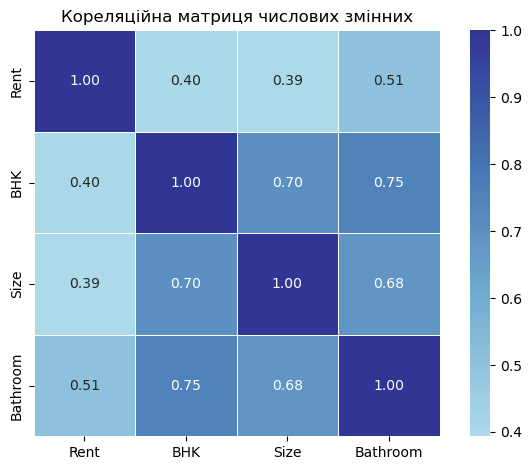

In [14]:
# 3.2 Heatmap кореляційної матриці
plt.figure()
sns.heatmap(correlation_matrix,
            annot=True,           # Показуємо числові значення
            cmap='RdYlBu',        # Кольорова схема
            center=0,             # Центруємо на 0
            square=True,          # Квадратні клітинки
            linewidths=0.5,       # Лінії між клітинками
            fmt='.2f')            # Формат чисел

plt.title('Кореляційна матриця числових змінних')
plt.tight_layout()

**Висновок:** Rent досить сильно корелює з BHK, Size та Bathroom.

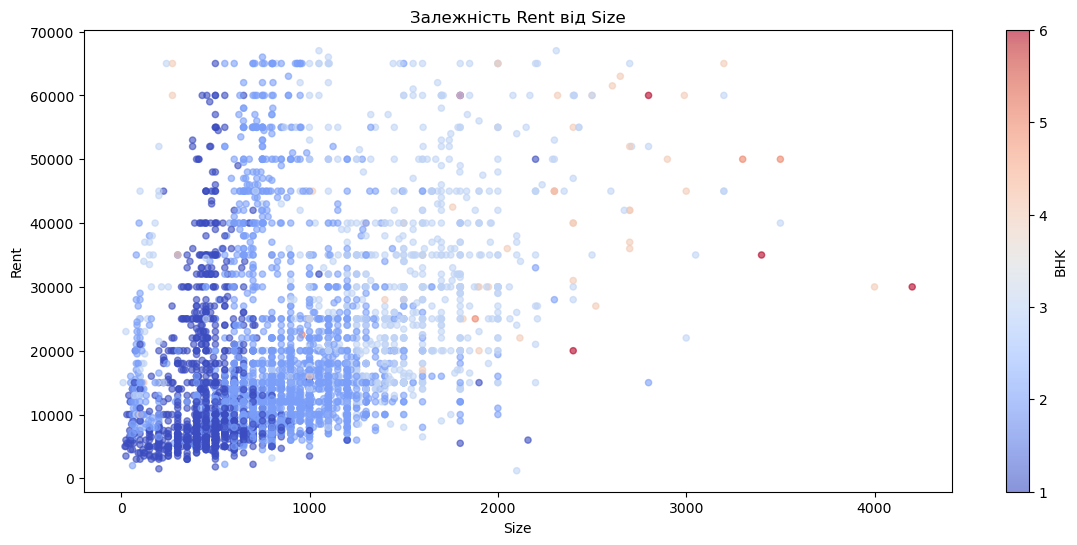

In [15]:
# 3.3 Scatter plot між Size та Rent
df_clean.plot.scatter(
    x='Size',
    y='Rent',
    c='BHK',
    colormap='coolwarm',
    figsize=(14,6),
    title='Залежність Rent від Size',
    # xlabel='Розмір житла',
    # ylabel='Ціна оренди',
    alpha=0.6
);

**Висновок:**  
- Існує чітка позитивна кореляція між площею (Size) та орендною платою (Rent). Зі збільшенням розміру житла орендна плата, як правило, також зростає.
- Більшість об'єктів зосереджені в діапазоні від 1500 до 50000, що свідчить про переважання середнього сегменту на ринку.
- Кольорова шкала показує, що вищі значення BHK (3-6) відповідають більшим площам і вищим орендним ставкам.
  1-2 BHK переважають у нижньому лівому куті графіка - тобто менші квартири з доступною орендою.
- Навіть при однаковій площі, орендна плата може суттєво відрізнятися. Це може бути пов’язано з іншими факторами: місто, район, меблювання, тип орендаря тощо.

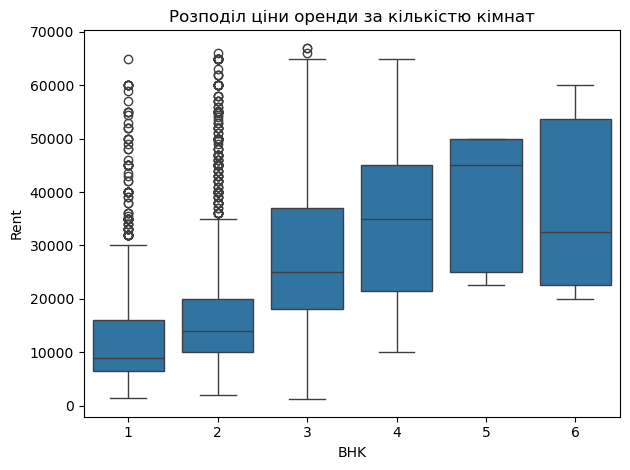

In [16]:
# 3.4  Взаємозв'язок між BHK та Rent за допомогою boxplot (який розподіл плати для різних значень BHK)
sns.boxplot(
    data=df_clean, 
    x='BHK', 
    y='Rent');
plt.title('Розподіл ціни оренди за кількістю кімнат')
# plt.xlabel('Ціна оренди')
# plt.ylabel('Кількість кімнат')
plt.tight_layout()

**Висновок:**  
- Загальна тенденція: зі збільшенням кількості кімнат (BHK) орендна плата загалом зростає, що логічно - більші квартири коштують дорожче.
- Медіана оренди зростає з BHK: квартири з більшою кількістю кімнат мають вищу медіанну орендну плату. Однак є виключення для ВНК = 6, тут медіана нижча за ВНК = 5 та ВНК = 6.
- Для 1–2 BHK розподіл досить компактний, ціни стабільні. Але є викиди.
- Починаючи з 3 BHK, розкид орендної плати значно зростає - це може свідчити про різноманітність у типі житла (від стандартних до преміум).
- Накладання цін між категоріями: деякі BHK = 2 мають орендну плату, схожу на BHK = 3 та 4, що свідчить про те, що кількість кімнат - не єдиний фактор, який визначає ціну. Важливу роль відіграють площа, місто, район, стан меблювання тощо.

## Завдання 4: Feature Engineering та підготовка даних (4 бали)

**Що потрібно зробити:**
1. Закодуйте категоріальні змінні за допомогою One-Hot Encoding. Пригадайте, що в лекції ми говорили щодо кодування кат. змінних з великої кількістю різних значень і як працювати з такими випадками. Ви можете закодувати не всі кат. змінні, а лише ті, що вважаєте за потрібні (скажімо ті, що мають відносно небагато різних значень).
2. **Опціонально (по 0.5 бала за кожну доцільну ознаку):** Додайте нові ознаки, обчислені на основі наявних даних, які б на ваш погляд були корисними для моделі
3. Виберіть ознаки для побудови моделі (виключіть непотрібні колонки). Виключити можна, наприклад, ті колонки, які мають категоріальний тип і забагато (більше 20) різних значень. Треба виключити хоча б 1 колонку.
4. Розділіть дані на ознаки (X) та цільову змінну (y)
5. Застосуйте стандартизацію до числових ознак


In [17]:
# Створення копії очищеного від викидів датафрейму, щоб доповнити його новими колонками закодованих категоріаньних змінних
df_enr = df_clean.copy()

In [18]:
df_clean[:2]

,Posted On,BHK,Rent,Size,Floor,Area Type,Area Locality,City,Furnishing Status,Tenant Preferred,Bathroom,Point of Contact
0,2022-05-18,2,10000,1100,Ground out of 2,Super Area,Bandel,Kolkata,Unfurnished,Bachelors/Family,2,Contact Owner
1,2022-05-13,2,20000,800,1 out of 3,Super Area,"Phool Bagan, Kankurgachi",Kolkata,Semi-Furnished,Bachelors/Family,1,Contact Owner


In [19]:
# 4.1.1 One-Hot Encoding для Area Type
# Використаємо drop_first=True, таким чином видалимо першу категорію з групи, щоб модель не отримала надлишкову інформацію (бо одна колонка завжди визначається через інші)
area_type_dummies = pd.get_dummies(df_clean['Area Type'], prefix='area_type', drop_first=True).astype(int)      # .astype(int) - Трансформуємо в integer, щоб отримати 0/1
area_type_dummies.head()                                                                                

,area_type_Carpet Area,area_type_Super Area
0,0,1
1,0,1
2,0,1
3,0,1
4,1,0


In [20]:
# 4.1.2 One-Hot Encoding для Furnishing Status
furnish_status_dummies = pd.get_dummies(df_clean['Furnishing Status'], prefix='furnish_status', drop_first=True).astype(int)
furnish_status_dummies[:2]

,furnish_status_Semi-Furnished,furnish_status_Unfurnished
0,0,1
1,1,0


In [21]:
# 4.1.3 One-Hot Encoding для Tenant Preferred
tenant_prefer_dummies = pd.get_dummies(df_clean['Tenant Preferred'], prefix='tenant_prefer', drop_first=True).astype(int)
tenant_prefer_dummies[:2]

,tenant_prefer_Bachelors/Family,tenant_prefer_Family
0,1,0
1,1,0


In [22]:
# 4.1.4 One-Hot Encoding для Point of Contact
contact_dummies = pd.get_dummies(df_clean['Point of Contact'], prefix='point', drop_first=True).astype(int)
contact_dummies[:2]

,point_Contact Builder,point_Contact Owner
0,0,1
1,0,1


In [23]:
# 4.1.5 One-Hot Encoding для City
city_dummies = pd.get_dummies(df_clean['City'], prefix='city', drop_first=True).astype(int)
city_dummies[:2]

,city_Chennai,city_Delhi,city_Hyderabad,city_Kolkata,city_Mumbai
0,0,0,0,1,0
1,0,0,0,1,0


In [24]:
# 4.1.6 Додаємо до датафрейму
df_enr = pd.concat(
    [df_enr, area_type_dummies, furnish_status_dummies, tenant_prefer_dummies, contact_dummies, city_dummies],
    axis=1
)

**4.2. Додамо нові ознаки**

In [25]:
# 4.2.1 Місяць публікації оголошення
# Додамо колонку Posted On в форматі datetime
df_enr['posted_on'] = pd.to_datetime(df_enr['Posted On'], errors='coerce')

# Додаємо колонку з номером місяця публікації
df_enr['month'] = df_enr['posted_on'].dt.month

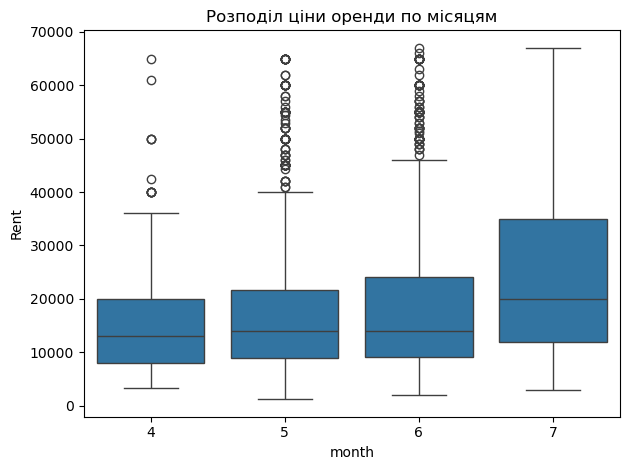

In [26]:
# Розподіл ціни оренди по місяцям
sns.boxplot(
    data=df_enr, 
    x='month', 
    y='Rent');
plt.title('Розподіл ціни оренди по місяцям')
# plt.xlabel('Ціна оренди')
# plt.ylabel('Місяць')
plt.tight_layout()

**Висновок:** спостерігаємо загальну тенденцію до зростання ціни оренди помісячно. Тому при прогнозуванні також додамо ознаку "Місяць публікації".

In [27]:
# Подивимось які унікальні значення містить колонка Floor
df_clean['Floor'].unique()

array(['Ground out of 2', '1 out of 3', '1 out of 2', 'Ground out of 1',
       'Ground out of 4', '1 out of 4', '1 out of 1', 'Ground out of 3',
       '2 out of 3', '4 out of 5', '2 out of 2', '2 out of 5',
       '4 out of 14', '3 out of 3', '5 out of 5', '4 out of 4',
       '7 out of 8', '2 out of 4', '3 out of 4', '1 out of 5',
       '8 out of 5', 'Ground out of 6', '2 out of 1',
       'Upper Basement out of 4', 'Ground out of 5', '3 out of 5',
       '11 out of 19', '5 out of 10', '11 out of 14',
       'Lower Basement out of 2', '2 out of 7', '7 out of 10',
       '6 out of 7', '4 out of 7', '2 out of 8', '5 out of 12',
       '11 out of 21', '14 out of 23', '9 out of 20',
       'Upper Basement out of 9', '19 out of 24', '3 out of 21',
       '1 out of 22', '3 out of 7', '8 out of 8', '6 out of 12',
       'Upper Basement out of 16', '34 out of 48', '5 out of 8',
       '5 out of 14', '14 out of 40', '9 out of 22', '12 out of 18',
       '26 out of 44', '1 out of 8', 'Ground

In [28]:
# 4.2.2 Витягнемо номер поверха житла та загальну кількість поверхів
def extract_and_categorize_floor(value):
    value = str(value).strip()         # .strip() - обрізає пробіли на початку і в кінці рядка

    # Початкові значення
    raw_floor = None
    raw_total = None

    # Обробка спеціальних випадків
    if value == 'Ground':
        raw_floor = 0
        raw_total = 0
    elif 'Ground' in value:
        raw_floor = 0
    elif 'Upper Basement' in value:
        raw_floor = -1
    elif 'Lower Basement' in value:
        raw_floor = -2
    else:
        try:
            raw_floor = int(value.split(' ')[0])
        except:
            pass

    # Витягуємо загальну кількість поверхів
    if 'out of' in value:
        try:
            raw_total = int(value.split('out of')[-1].strip())
        except:
            pass
    elif value == 'Ground':
        raw_total = 0

    # Категоризація
    def categorize(num):
        if num is None:
            return 'Unknown'
        elif num <= 0:
            return 'Ground/Basement'
        elif num == 1:
            return '1'
        elif num == 2:
            return '2'
        elif num == 3:
            return '3'
        elif num == 4:
            return '4'
        elif num == 5:
            return '5'
        elif 6 <= num <= 10:
            return '6–10'
        elif 11 <= num <= 15:
            return '11–15'
        elif 16 <= num <= 20:
            return '16–20'
        elif 21 <= num <= 25:
            return '21–25'
        elif 26 <= num <= 30:
            return '26–30'
        elif num >= 31:
            return '31+'
        else:
            return 'Unknown'

    return pd.Series({
        'floor_num': categorize(raw_floor),
        'total_floors': categorize(raw_total)
    })

In [29]:
# Додамо до датафрейму колонки з номером поверху та загальною кількістю поверхів 
df_enr[['floor_num', 'total_floors']] = df_clean['Floor'].apply(extract_and_categorize_floor)

In [30]:
# 4.2.2.1 One-Hot Encoding для floor_num
floor_num_dummies = pd.get_dummies(df_enr['floor_num'], prefix='floor_num', drop_first=True).astype(int)
floor_num_dummies[:2]

,floor_num_11–15,floor_num_16–20,floor_num_2,floor_num_21–25,floor_num_26–30,floor_num_3,floor_num_31+,floor_num_4,floor_num_5,floor_num_6–10,floor_num_Ground/Basement
0,0,0,0,0,0,0,0,0,0,0,1
1,0,0,0,0,0,0,0,0,0,0,0


In [31]:
# 4.2.2.2 One-Hot Encoding для total_floors
total_floors_dummies = pd.get_dummies(df_enr['total_floors'], prefix='total_floors', drop_first=True).astype(int)
total_floors_dummies[:2]

,total_floors_11–15,total_floors_16–20,total_floors_2,total_floors_21–25,total_floors_26–30,total_floors_3,total_floors_31+,total_floors_4,total_floors_5,total_floors_6–10,total_floors_Ground/Basement,total_floors_Unknown
0,0,0,1,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,1,0,0,0,0,0,0


In [32]:
# Додаємо до основного датафрейму
df_enr = pd.concat(
    [df_enr, floor_num_dummies, total_floors_dummies], 
    axis=1
)

In [33]:
df_enr[:2]

,Posted On,BHK,Rent,Size,Floor,Area Type,Area Locality,City,Furnishing Status,Tenant Preferred,Bathroom,Point of Contact,area_type_Carpet Area,area_type_Super Area,furnish_status_Semi-Furnished,furnish_status_Unfurnished,tenant_prefer_Bachelors/Family,tenant_prefer_Family,point_Contact Builder,point_Contact Owner,city_Chennai,city_Delhi,city_Hyderabad,city_Kolkata,city_Mumbai,posted_on,month,floor_num,total_floors,floor_num_11–15,floor_num_16–20,floor_num_2,floor_num_21–25,floor_num_26–30,floor_num_3,floor_num_31+,floor_num_4,floor_num_5,floor_num_6–10,floor_num_Ground/Basement,total_floors_11–15,total_floors_16–20,total_floors_2,total_floors_21–25,total_floors_26–30,total_floors_3,total_floors_31+,total_floors_4,total_floors_5,total_floors_6–10,total_floors_Ground/Basement,total_floors_Unknown
0,2022-05-18,2,10000,1100,Ground out of 2,Super Area,Bandel,Kolkata,Unfurnished,Bachelors/Family,2,Contact Owner,0,1,0,1,1,0,0,1,0,0,0,1,0,2022-05-18,5,Ground/Basement,2,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0
1,2022-05-13,2,20000,800,1 out of 3,Super Area,"Phool Bagan, Kankurgachi",Kolkata,Semi-Furnished,Bachelors/Family,1,Contact Owner,0,1,1,0,1,0,0,1,0,0,0,1,0,2022-05-13,5,1,3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0


In [34]:
df_enr.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4226 entries, 0 to 4745
Data columns (total 52 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   Posted On                       4226 non-null   object        
 1   BHK                             4226 non-null   int64         
 2   Rent                            4226 non-null   int64         
 3   Size                            4226 non-null   int64         
 4   Floor                           4226 non-null   object        
 5   Area Type                       4226 non-null   object        
 6   Area Locality                   4226 non-null   object        
 7   City                            4226 non-null   object        
 8   Furnishing Status               4226 non-null   object        
 9   Tenant Preferred                4226 non-null   object        
 10  Bathroom                        4226 non-null   int64         
 11  Point of 

In [35]:
# 4.3 Вибираємо ознаки для побудови моделі (видаляємо непотрібні колонки з df_enr)
# Вибираємо назви всіх нечислових колонок
cols_to_drop = df_enr.select_dtypes(exclude='number').columns

# Видаємо всі нечислові колонки
df_enr.drop(cols_to_drop, axis=1, inplace=True)

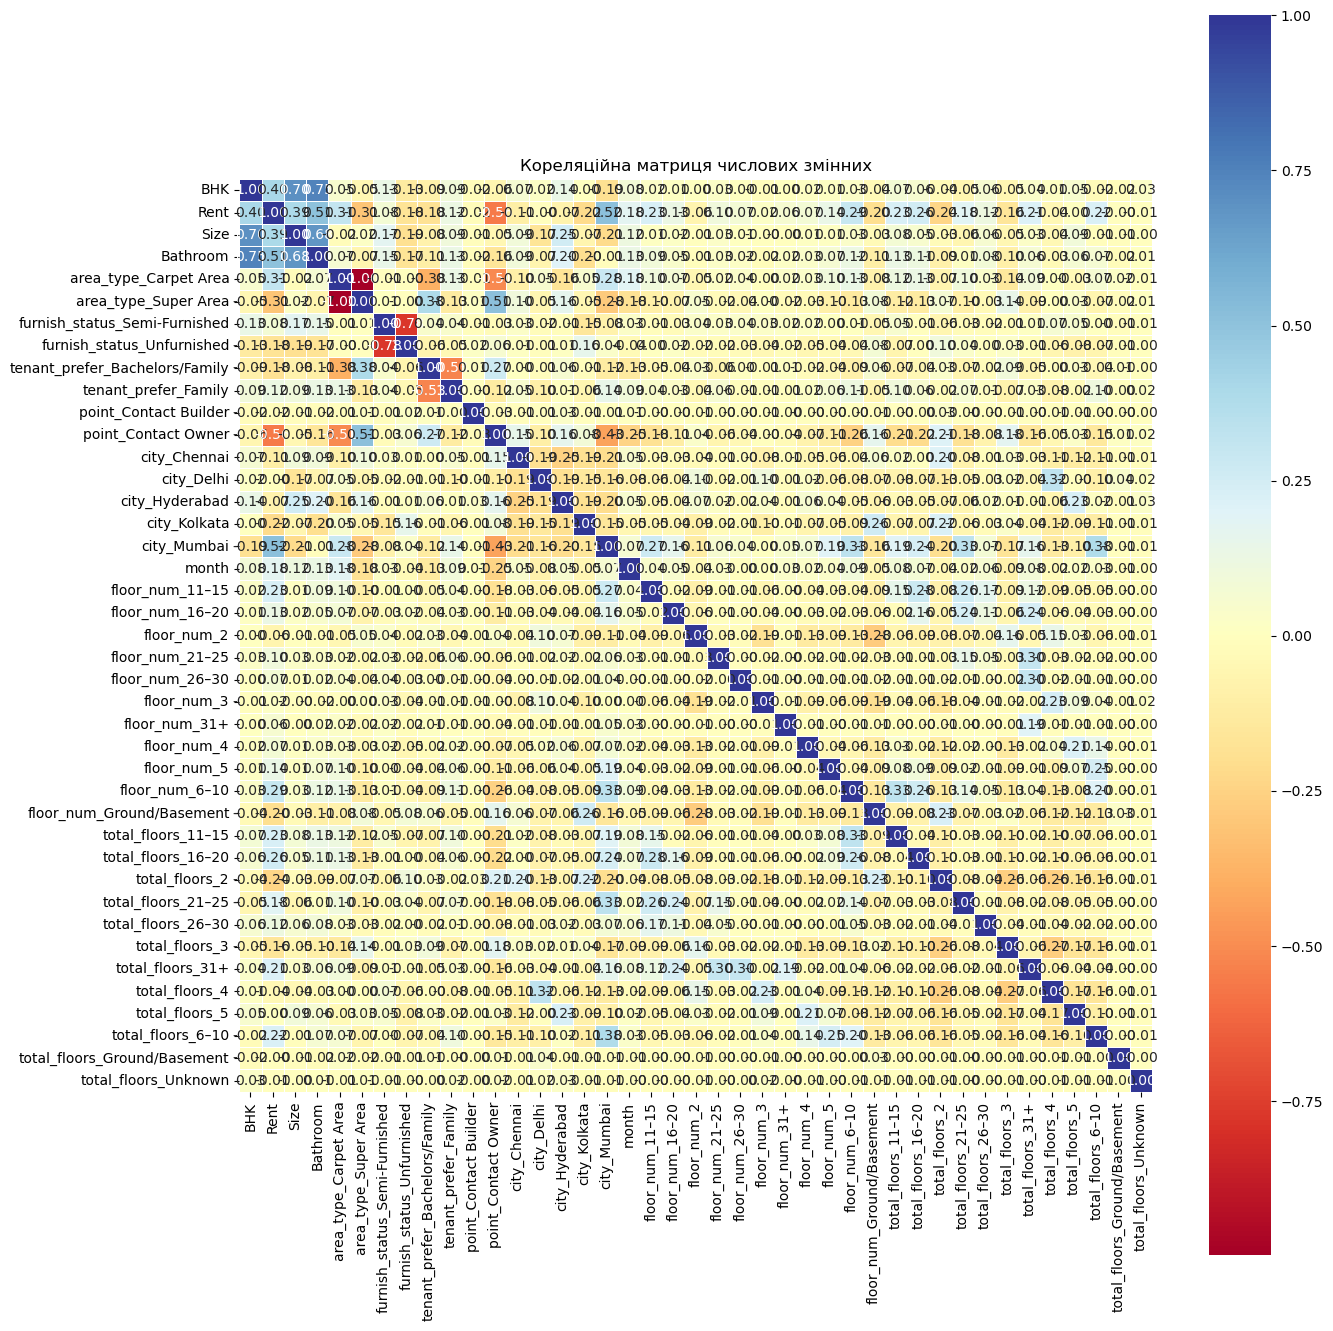

In [36]:
correlation_matrix_full = df_enr.corr()
plt.figure(figsize=(14,14))
sns.heatmap(correlation_matrix_full,
            annot=True,           # Показуємо числові значення
            cmap='RdYlBu',        # Кольорова схема
            center=0,             # Центруємо на 0
            square=True,          # Квадратні клітинки
            linewidths=0.5,       # Лінії між клітинками
            fmt='.2f')            # Формат чисел

plt.title('Кореляційна матриця числових змінних')
plt.tight_layout()

In [37]:
# Перевіряємо типи колонок після видалення
df_enr.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4226 entries, 0 to 4745
Data columns (total 41 columns):
 #   Column                          Non-Null Count  Dtype
---  ------                          --------------  -----
 0   BHK                             4226 non-null   int64
 1   Rent                            4226 non-null   int64
 2   Size                            4226 non-null   int64
 3   Bathroom                        4226 non-null   int64
 4   area_type_Carpet Area           4226 non-null   int32
 5   area_type_Super Area            4226 non-null   int32
 6   furnish_status_Semi-Furnished   4226 non-null   int32
 7   furnish_status_Unfurnished      4226 non-null   int32
 8   tenant_prefer_Bachelors/Family  4226 non-null   int32
 9   tenant_prefer_Family            4226 non-null   int32
 10  point_Contact Builder           4226 non-null   int32
 11  point_Contact Owner             4226 non-null   int32
 12  city_Chennai                    4226 non-null   int32
 13  city_Del

In [38]:
# 4.4 Розділення даних на ознаки (X) та цільову змінну (y)
exclude_cols = ['Rent']        # задаємо цільву колонку, яку потрібно виключити з ознак
feature_cols = [col for col in df_enr.columns if col not in exclude_cols]

X = df_enr.drop('Rent', axis=1)
y = df_enr['Rent']

print(f"Кількість ознак: {X.shape[1]}")
print(f"Розмір вибірки: {X.shape[0]}")

Кількість ознак: 40
Розмір вибірки: 4226


In [39]:
# 4.5 Застосовуємо стандартизацію до числових ознак
from sklearn.preprocessing import StandardScaler

# Створюємо та застосовуємо скейлер
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Перетворюємо назад у DataFrame для зручності
X_scaled_df = pd.DataFrame(X_scaled, columns=X.columns, index=X.index)

## Завдання 5: Розділення даних та навчання моделі (3 бали)

**Що потрібно зробити:**
1. Розділіть дані на навчальну (80%) та тестову (20%) вибірки.
2. Створіть модель лінійної регресії.
3. Навчіть модель на навчальних даних.
4. Виведіть усі коефіцієнти моделі (ваги) та напишіть, які 2 ознаки найбільше впливають на прогноз.
5. Зробіть прогнози на тренувальній та тестовій вибірках.

In [40]:
# 5.1 Розділення даних на навчальну (80%) та тестову (20%) вибірки
from sklearn.model_selection import train_test_split

# Розділяємо дані: 80% на навчання, 20% на тест
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled_df, y,
    test_size=0.2,  # 20% даних йде на тест
    random_state=42  # фіксуємо випадковість для відтворюваності
)

In [41]:
# 5.2 Створення моделі лінійної регресії
from sklearn.linear_model import LinearRegression

# Створюємо модель
model = LinearRegression()

In [42]:
# 5.3 Навчаємо модель на навчальних даних
model.fit(X_train, y_train)

LinearRegression()

In [43]:
# 5.4 Виводимо ваги для кожної ознаки
for feature, weight in zip(model.feature_names_in_, model.coef_):
    print(f"{feature}: {weight:.2f}")

print(f"\nЗміщення (intercept): {model.intercept_:.2f}")

BHK: 2443.17
Size: 3843.44
Bathroom: 1728.23
area_type_Carpet Area: -780.14
area_type_Super Area: -947.33
furnish_status_Semi-Furnished: -1654.45
furnish_status_Unfurnished: -2084.32
tenant_prefer_Bachelors/Family: -317.91
tenant_prefer_Family: -724.27
point_Contact Builder: -64.44
point_Contact Owner: -3343.08
city_Chennai: -426.32
city_Delhi: 794.60
city_Hyderabad: -1092.18
city_Kolkata: -863.37
city_Mumbai: 5748.04
month: 210.79
floor_num_11–15: -26.62
floor_num_16–20: -539.11
floor_num_2: -76.58
floor_num_21–25: 274.78
floor_num_26–30: 28.57
floor_num_3: 25.77
floor_num_31+: 67.74
floor_num_4: 52.80
floor_num_5: -75.85
floor_num_6–10: -61.08
floor_num_Ground/Basement: -73.38
total_floors_11–15: 884.46
total_floors_16–20: 1351.54
total_floors_2: 223.41
total_floors_21–25: 602.99
total_floors_26–30: 478.84
total_floors_3: 746.69
total_floors_31+: 1336.89
total_floors_4: 429.65
total_floors_5: 685.45
total_floors_6–10: 964.32
total_floors_Ground/Basement: 106.92
total_floors_Unknown: 

**Висновок:** дві ознаки, які найбільше впливають на прогноз - це Size та BHK.

In [45]:
# 5.5 Робимо прогнози на тренувальній та тестовій вибірках
# Прогнози на навчальній вибірці
y_train_pred = model.predict(X_train)

# Прогнози на тестовій вибірці
y_test_pred = model.predict(X_test)

# Порівняння перших 10 прогнозів з реальністю
comparison = pd.DataFrame({
    'Реальні ціни оренди': y_test.values[:10],
    'Прогнозовані ціни оренди': y_test_pred[:10].round(0),
    'Помилка': (y_test.values[:10] - y_test_pred[:10]).round(0)
})
print("Приклади прогнозів на тестовій вибірці:")
print(comparison)

Приклади прогнозів на тестовій вибірці:
   Реальні ціни оренди  Прогнозовані ціни оренди  Помилка
0                22000                   27529.0  -5529.0
1                 5000                    2510.0   2490.0
2                37000                   38773.0  -1773.0
3                 8000                    3475.0   4525.0
4                15000                   14199.0    801.0
5                20000                   24137.0  -4137.0
6                 8500                   17863.0  -9363.0
7                 7000                    3765.0   3235.0
8                 3000                    1591.0   1409.0
9                 8000                    6603.0   1397.0


**Висновок:** бачимо модель не є надто точною

## Завдання 6: Оцінка якості моделі (2 бали)

**Що потрібно зробити:**
1. Обчисліть MAE, RMSE та R² для навчальної та тестової вибірок
2. Порівняйте метрики та зробіть висновок про якість моделі
3. Проаналізуйте і дайте висновок, чи є ознаки перенавчання або недонавчання (**Нагадування**: перенавчання - коли модель дуже добре працює на тренувальних даних, але погано на тестових; недонавчання - коли модель погано працює навіть на тренувальних даних)
4. Побудуйте графік розсіювання "реальні vs прогнозовані значення" та зробіть висновок про якість моделі


In [46]:
# 6.1 Обчислення MAE, RMSE та R² для навчальної та тестової вибірок
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Розраховуємо метрики для тестової вибірки
mae = mean_absolute_error(y_test, y_test_pred)
mse = mean_squared_error(y_test, y_test_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_test_pred)

print("="*50)
print("МЕТРИКИ ЯКОСТІ МОДЕЛІ (на тестовій вибірці):")
print("="*50)
print(f"\nMAE: {mae:.2f} орендної плати")
print(f"RMSE: {rmse:.2f} орендної плати")
print(f"R²: {r2:.3f}")

# Розраховуємо метрики для навчальної вибірки
mae = mean_absolute_error(y_train, y_train_pred)
mse = mean_squared_error(y_train, y_train_pred)
rmse = np.sqrt(mse)
r2_train = r2_score(y_train, y_train_pred)

print("="*50)
print("МЕТРИКИ ЯКОСТІ МОДЕЛІ на тренувальній вибірці:")
print("="*50)
print(f"\nMAE: {mae:.2f} орендної плати")
print(f"RMSE: {rmse:.2f} орендної плати")
print(f"R²: {r2_train:.3f}")

МЕТРИКИ ЯКОСТІ МОДЕЛІ (на тестовій вибірці):

MAE: 5438.38 орендної плати
RMSE: 7617.25 орендної плати
R²: 0.697
МЕТРИКИ ЯКОСТІ МОДЕЛІ на тренувальній вибірці:

MAE: 5413.83 орендної плати
RMSE: 7529.07 орендної плати
R²: 0.703


In [48]:
# Середнє знаення y_train 
np.mean(y_train)

19349.54852071006

**6.2 Порівняння метрик та оцінка якості моделі:**  
- MAE ≈ 5400 в обох випадках. Це означає, що в середньому модель помиляється на 5400. Середнє знаення y_train = 19349.55, тобто відносно середньої оренди MAE ≈ 28%.
- RMSE ≈ 7500 - 7600, це в 1.38 разів більше за MAE, що не є критично. RMSE чутлива до викидів. В цілому RMSE складає ≈ 39% відносно середньої оренди.
- R² ≈ 0.7 на обох вибірках. Це означає, що модель пояснює близько 70% варіації орендної плати.

 **Оцінка якості моделі:** модель добре працює, має стабільні метрики. Вона прогнозує ціну оренди з середньою похибкою менше 30% від середньої ціни. 

 **6.3 Висновки щодо навчання моделі:**  
Метрики на тренувальній і тестовій вибірках майже однакові, що свідчить про:
- Відсутність перенавчання;
- Модуль добре узагальнює, навчилась закономірностям, а не запам'ятала дані;
- Добре підібрані ознаки.

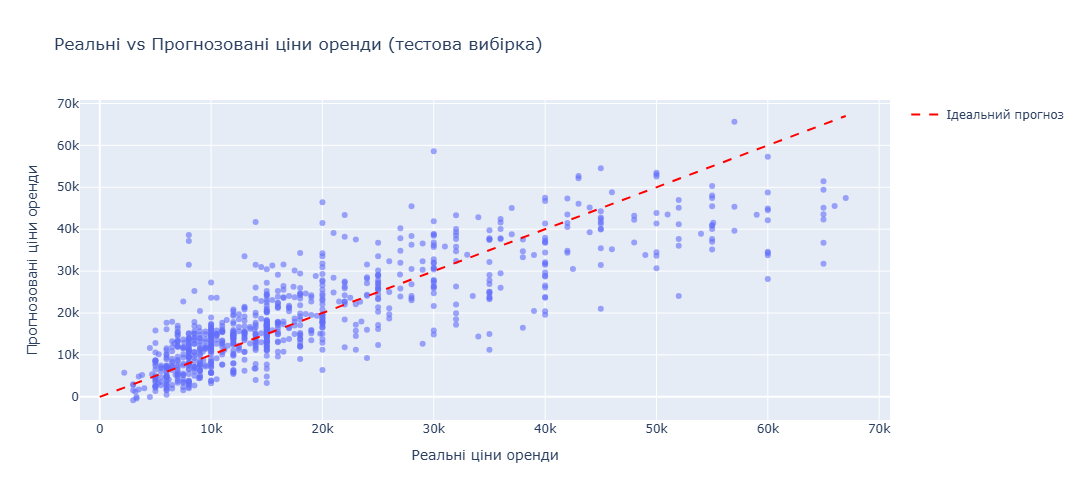

In [49]:
# 6.4 Графік розсіювання "Реальні vs Прогнозовані значення"

# Візуалізація: реальні vs прогнозовані значення
fig = px.scatter(
    x=y_test,
    y=y_test_pred,
    title='Реальні vs Прогнозовані ціни оренди (тестова вибірка)',
    labels={'x': 'Реальні ціни оренди', 'y': 'Прогнозовані ціни оренди'},
    opacity=0.6
)

# Додаємо ідеальну лінію (де прогноз = реальність)
max_val = max(y_test.max(), y_test_pred.max())
fig.add_trace(
    go.Scatter(
        x=[0, max_val],
        y=[0, max_val],
        mode='lines',
        name='Ідеальний прогноз',
        line=dict(color='red', dash='dash')
    )
)

fig.update_layout(height=500)
fig.show()

**Висновок щодо якості моделі:**  
- більшість точок розташовані близько до ідеальної червоної лінії, це свідчить про хорошу узгодженість між раельними та прогнозованими значеннями;
- Є розкид навколо червої лінії, особливо при високих цінах. Це пояснюється високою варіативністю дорогого житла;
- При високих реальних цінах модель часто недооцінює. Можливо для більш дорого житла потрібно робити окрему модель.

## Завдання 7: Аналіз помилок (4 бали)

**Що потрібно зробити:**
1. Обчисліть помилки (residuals = реальні - прогнозовані значення)
2. Побудуйте гістограму розподілу помилок
3. Створіть scatter plot помилок відносно величини прогнозованих значень. Чи росте помилка з ростом прогнозованого значення?
4. Знайдіть 5 прогнозів з найбільшими помилками
5. Проаналізуйте, на яких типах житла модель помиляється найбільше. Типи можна розрізняти за кількістю кімнат чи містом, наприклад.
6. Подумайте і напишіть, які наступні кроки ви б зробили, аби поліпшити якість моделі. Опціонально можна їх зробити і ми перевіримо :)

In [50]:
# 7.1 Обчислення помилок
residuals = y_test - y_test_pred

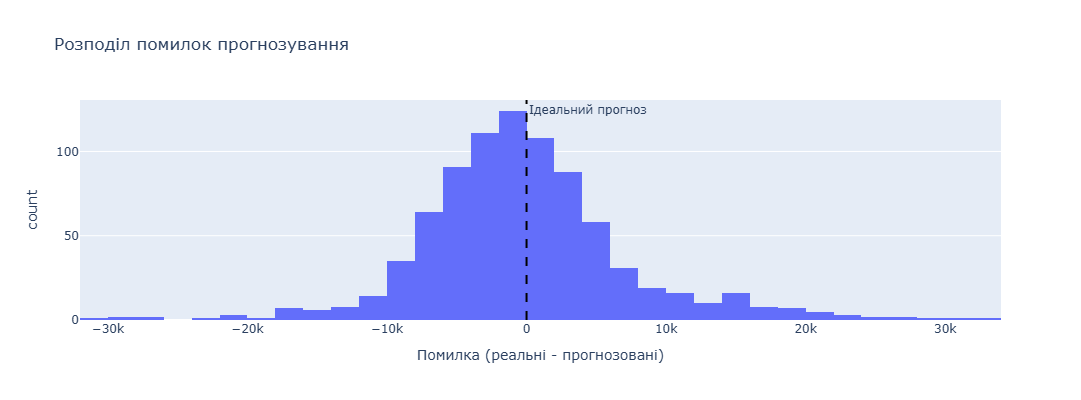

In [51]:
# 7.2 Гістограма розподілу помилок
fig = px.histogram(
    x=residuals,
    nbins=50,
    title='Розподіл помилок прогнозування',
    labels={'x': 'Помилка (реальні - прогнозовані)', 'count': 'Кількість'},
    color_discrete_sequence=['Royal Blue']
)
fig.add_vline(x=0, line_dash="dash", line_color="black", annotation_text="Ідеальний прогноз")
fig.update_layout(height=400)
fig.show()

**Висновок:**  
- більшість помилок сконцентровані навколо нуля, це означає, що модель в середньому не переоцінює і не недооцінює;
- гістограма має дзвоноподібну форму, що нагадує нормальний розподіл;
- розподіл майже симетричний, тобто кількість недооцінених та переоцінених об'єктів приблизно однакова;
- діапазон помилок від -30000 до 30000.

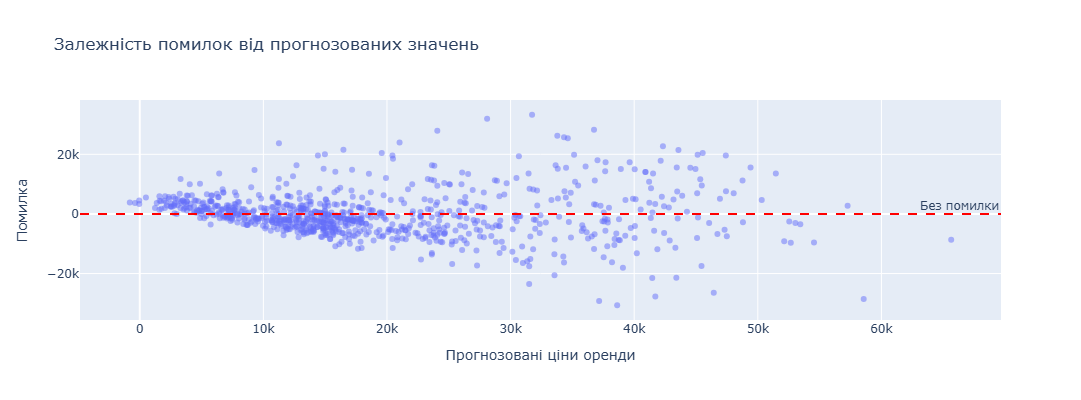

In [52]:
# 7.3 Scatter plot помилок відносно величини прогнозованих значень
fig = px.scatter(
    x=y_test_pred,
    y=residuals,
    title='Залежність помилок від прогнозованих значень',
    labels={'x': 'Прогнозовані ціни оренди', 'y': 'Помилка'},
    opacity=0.5
)

# Додаємо горизонтальну лінію на 0
fig.add_hline(y=0, line_dash="dash", line_color="red", annotation_text="Без помилки")

fig.update_layout(height=400)
fig.show()

**Висновок:**  
- помилка росте при збільшенні прогнозованої вартості житла;
- при низьких прогнозованих значеннях (до 20000) помилки розкидані блько нуля;
- при більш високих прогнозованих значення розкид помилок збільшується, причому як у позитивний, так і у негативний боки. Тобто модель менш стабільна для прогнозування більш високого житла.

In [53]:
# 7.4 ТОП-5 прогнозів з найбільшими помилками
errors_df = pd.DataFrame({
    'real': y_test.values,
    'predicted': y_test_pred,
    'error': np.abs(residuals)
}, index=X_test.index)          # зберігаємо індекс

# Топ-5 найбільших помилок
top_errors = errors_df.nlargest(5, 'error')

top_errors_full = top_errors.join(df_clean[['BHK', 'Size', 'Bathroom', 'Area Type', 'Area Locality', 'City']])

print("Житло з найбільшими помилками прогнозування:")
print(top_errors_full)

Житло з найбільшими помилками прогнозування:
       real     predicted         error  BHK  Size  Bathroom    Area Type  \
3962  65000  31737.298892  33262.701108    3  1850         3  Carpet Area   
809   60000  28100.368594  31899.631406    1   455         1  Carpet Area   
549    8000  38623.654178  30623.654178    2   650         2  Carpet Area   
904    8000  37164.281753  29164.281753    2   550         2  Carpet Area   
275   30000  58567.660284  28567.660284    4  4000         3   Super Area   

                    Area Locality       City  
3962   Patrika Nagar, Hitech City  Hyderabad  
809       Sugee Sadan, Dadar West     Mumbai  
549    Nakoda Heights, Nalasopara     Mumbai  
904    Nakoda Heights, Nalasopara     Mumbai  
275   Sakher Bazar, Purba Barisha    Kolkata  


In [54]:
df_clean.loc[[3962, 809, 549, 904, 275]]

,Posted On,BHK,Rent,Size,Floor,Area Type,Area Locality,City,Furnishing Status,Tenant Preferred,Bathroom,Point of Contact
3962,2022-07-08,3,65000,1850,5 out of 5,Carpet Area,"Patrika Nagar, Hitech City",Hyderabad,Furnished,Bachelors,3,Contact Owner
809,2022-06-30,1,60000,455,18 out of 22,Carpet Area,"Sugee Sadan, Dadar West",Mumbai,Unfurnished,Bachelors/Family,1,Contact Agent
549,2022-06-02,2,8000,650,Upper Basement out of 9,Carpet Area,"Nakoda Heights, Nalasopara",Mumbai,Semi-Furnished,Family,2,Contact Agent
904,2022-06-20,2,8000,550,3 out of 9,Carpet Area,"Nakoda Heights, Nalasopara",Mumbai,Unfurnished,Family,2,Contact Agent
275,2022-07-04,4,30000,4000,Ground out of 3,Super Area,"Sakher Bazar, Purba Barisha",Kolkata,Furnished,Bachelors/Family,3,Contact Agent


**7.5 Аналіз помилок моделі:**  
- модель найбільше помиляється на житлі з дуже великою площею (1850 та 4000) та великою ціною. І кількість BHK тут ≥3.
- модель сильно помиляється для дороговартісного житла з великою площею (455), і BHK=1. Але по тому, що житло знаходиться в висотному будинку можна зробити висновок, що це не бідний район Індії. А модель взагалі не враховує Area Locality.
- модель помиляються для не дорогого житла (8000) з великою площею (550 та 650). Обидві помилки припадають на житло у місті Mumbai.

**7.6 Наступні кроки для поліпшення моделі:**  
- однозначно житло на дороге та недороге. Можливо, для кожного робити окрему модель.
- добре очистити початкові дані, видалити рядки, що схожі на помилку. До прикладу рядок з індексом 4653 (Size=10, BHK=3, Bathroom=3).
- проаналізувати ознаки перед побудовою моделі. Є другорядні, такі як Tenant Preferred, Point of Contact, Posted On, навіть Furnishing Status. Повністю переробити розбивку по номеру поверху (скоріше це також другорядна ознака) т азагальній кількості поверхів.
- на етапі аналізу даних проаналізувати Area Locality, щоб зробити сегментацію по районам. Цю ознаку додати при побудові моделі моделі.